In [2]:
from IPython.display import display
from PIL import Image
import numpy as np



 [[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 1 1 1]]


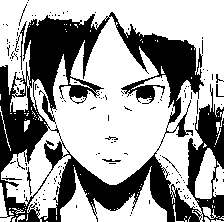

In [28]:
img_gray = Image.open("../Images/img3/eren_gray.jpg") # open colour image
img_bin = img_gray.convert('1', dither=Image.NONE)
img_bin = np.array(img_bin, dtype=np.uint8)
L, C = img_bin.shape
im = img_bin
print("\n\n", im)
display(Image.fromarray(im * 255))

In [48]:
from PIL import Image

# Création d'une matrice représentant une image binaire noir et blanc
image_binaire = [
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [1, 0, 1, 0]
]

# Conversion de la matrice en objet Image avec la bibliothèque PIL
image_pil = Image.new('1', (len(image_binaire[0]), len(image_binaire)))
for y, ligne in enumerate(image_binaire):
    for x, pixel in enumerate(ligne):
        image_pil.putpixel((x, y), pixel)

# Sauvegarde de l'image binaire dans un fichier
image_pil.save('image_binaire.png')

# Récupération de l'image à partir du fichier
image_recuperee = Image.open('image_binaire.png')
print(np.array(image_recuperee, dtype=np.uint))
print(np.array(image_binaire))

# Affichage de l'image récupérée
display(image_recuperee)
print(np.array_equal(np.array(image_binaire), np.array(image_recuperee, dtype=np.uint)))

[[0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]]
[[0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]]


True


In [272]:
def vecteur_ligne(matrice):
  vecteur = np.array(matrice, dtype=np.uint8)
  vecteur = vecteur.flatten()
  return np.array(vecteur, dtype=np.uint8)

In [273]:
def inverse_vecteur_ligne(vecteur, lignes, colonnes):
  mat = np.array(vecteur, dtype=np.uint8)
  mat = mat.reshape((lignes, colonnes))
  return mat.astype(np.uint8)

In [274]:
def vecteur_colonne(matrice):
  vecteur = np.ravel(matrice, order = 'F')
  return np.array(vecteur, dtype=np.uint8)

In [275]:
def inverse_vecteur_colonne(vecteur, lignes, colonnes):
  aux = lignes
  lignes = colonnes
  colonnes = aux
  mat = np.array(vecteur, dtype=np.uint8)
  mat = mat.reshape((lignes, colonnes))
  mat = mat.T
  return mat.astype(np.uint8)

In [276]:
def vecteur_zigzag(matrice):
    matrice = np.array(matrice, dtype=np.uint8)
    lignes, colonnes = matrice.shape
    solution = [[] for i in range(lignes + colonnes - 1)]
    
    for i in range(lignes):
        for j in range(colonnes):
            somme = i + j
            if somme % 2 == 0:
                solution[somme].insert(0, matrice[i, j])
            else:
                solution[somme].append(matrice[i, j])
    resultat = np.concatenate(solution)
    
    return np.array(resultat, dtype=np.uint8)

In [277]:
def inverse_vecteur_zigzag(vecteur, lignes, colonnes):
    aux = lignes
    lignes = colonnes
    colonnes = aux
    nb_elements = lignes * colonnes
    
    if len(vecteur) != nb_elements:
        raise ValueError("La longueur du vecteur ne correspond pas au nombre total d'éléments de la matrice.")
    
    matrice = np.zeros((lignes, colonnes), dtype=np.int8)
    solution = [[] for i in range(lignes + colonnes - 1)]
    
    for i in range(lignes + colonnes - 1):
        nb_elements = min(i + 1, lignes, colonnes, lignes + colonnes - 1 - i)
        for j in range(nb_elements):
            if i % 2 == 0:
                solution[i].append(vecteur.pop(0))
            else:
                solution[i].insert(0, vecteur.pop(0))
                
    for i in range(lignes):
        for j in range(colonnes):
            matrice[i, j] = solution[i + j].pop(0)
            
    matrice = matrice.T
    return matrice.astype(np.uint8)

### (1). Écrire une fonction qui extrait les différents symboles ainsi que leurs fréquences respectives

In [278]:
def ext_chr(chaine):
  occ = {c: chaine.count(c) for c in set(chaine)}
  return sorted(occ.items(), key = lambda x: x[1], reverse = True)

In [279]:
def frequency(chaine):
  freq = {c: (chaine.count(c))/len(chaine) for c in set(chaine)}
  return sorted(freq.items(), key = lambda x: x[1])

### (2). Écrire une fonction qui crée le dictionnaire de codes $Huffman$ et qui en déduit les codes de compression

In [280]:
def arbre_huffman(chaine):
  noeuds = ext_chr(chaine)
  
  while len(noeuds) > 1:
    (key1, c1) = noeuds.pop()
    (key2, c2) = noeuds.pop()
    noeud = (key1, key2)
    noeuds.append((noeud, c1 + c2))
    noeuds.sort(key = lambda x: x[1], reverse = True)
    
  return noeuds[0][0]

In [281]:
def dictionnaire_huffman(noeud, binstring = ''):
  if isinstance(noeud, str):
    return {noeud: binstring}
  (l, r) = noeud
  d = {}
  d.update(dictionnaire_huffman(l, binstring + '0'))
  d.update(dictionnaire_huffman(r, binstring + '1'))
  return d

In [282]:
def compress_huffman(chaine):
  noeuds = arbre_huffman(chaine)
  codeHuffman = dictionnaire_huffman(noeuds)
  chaine_compresse = ''
  
  for char in chaine:
    chaine_compresse += codeHuffman[char]
  
  return chaine_compresse

### (3). Écrire une fonction qui évalue toutes les caractéristiques du code

In [283]:
def entropy(chaine):
  liste = []
  
  for i, j in frequency(chaine):
    liste.append(j)
  
  return -np.sum(liste * np.log2(liste))

In [284]:
def mean_length(chaine):
  arbre = arbre_huffman(chaine)
  frequence = frequency(chaine)
  dictionnaire = dictionnaire_huffman(arbre).items()
  dictionnaire = list(dictionnaire)
  aux = []
  sum = 0
  
  for i, j in dictionnaire:
    for k, l in frequence:
      if i == k:
        aux.append(((i, j), (k, l)))
        sum += l * len(j)
        
  #print(aux)
    
  return sum

In [285]:
def efficacity(chaine):
  return entropy(chaine) / mean_length(chaine)

In [286]:
def rendement(chaine, alphabet_code):
  return entropy(chaine) / (mean_length(chaine) * np.log2(alphabet_code))

In [287]:
def redondance(chaine, alphabet_code):
  return 1 - rendement(chaine, alphabet_code)

In [288]:
def features(chaine, alphabet_code):
  caracteristiques = {}
  
  caracteristiques['Entropie'] = entropy(chaine)
  caracteristiques['Longueur_moyenne'] = mean_length(chaine)
  caracteristiques['Efficacité'] = efficacity(chaine)
  caracteristiques['Rendement'] = rendement(chaine, alphabet_code)
  caracteristiques['Redondance'] = redondance(chaine, alphabet_code)
  
  return caracteristiques

### (4). Écrire une fonction qui réalise le décodage d’une liste de booléen selon l’arbre passé en paramètre et qui permet de remonter à la séquence initiale.

In [289]:
def decompress_huffman(chaine_compressee, arbre):
  codeHuffman = dictionnaire_huffman(arbre)
  chaine_decompressee = ''
  code = ''
  
  for bit in chaine_compressee:
    code += bit
    for char, encoding in codeHuffman.items():
      if code == encoding:
        chaine_decompressee += char
        code = ''
        break
  
  return chaine_decompressee

In [290]:
def taux_compression(data, compressed_data):
    taux = 1 - (len(compressed_data) / (len(data) * 8))
    return taux * 100

In [291]:
def chaine_ASCII(liste):
    chaine_binaire = ""
    for caractere in liste:
        chaine_binaire += chr(caractere)
    return chaine_binaire

In [292]:
def chaine_ASCII_inverse(chaine):
    chaine_binaire = []
    for caractere in chaine:
        chaine_binaire.append(ord(caractere))
    return chaine_binaire

In [293]:
img_bin = vecteur_ligne(img_bin)

In [294]:
dictionnaire_huffman(arbre_huffman(chaine_ASCII(img_bin)))

{'\x00': '0', '\x01': '1'}

In [295]:
def huffman_binary(image):
  image = chaine_ASCII(image)
  compressed = compress_huffman(image)
  return compressed

In [296]:
def huffman_binary_inverse(compressed_image, image_vector):
  image_vector = chaine_ASCII(image_vector)
  arbre = arbre_huffman(image_vector)
  decompressed = decompress_huffman(compressed_image, arbre)
  image = chaine_ASCII_inverse(decompressed)
  return image

In [297]:
compressed = huffman_binary(img_bin)

In [298]:
print(f"taux de compression: {taux_compression(img_bin, compressed)} %")

taux de compression: 87.5 %


In [299]:
decompressed = huffman_binary_inverse(compressed, img_bin)

In [300]:
img = inverse_vecteur_ligne(decompressed, L, C)

In [301]:
if (img_bin == decompressed).all():
  print("Les vecteurs images sont identiques")
else:
  print("Les vecteurs images ne sont pas identiques")

Les vecteurs images sont identiques


In [302]:
if (im == img).all():
  print("Les matrices images sont identiques")
else:
  print("Les matrices images ne sont pas identiques")

Les matrices images sont identiques


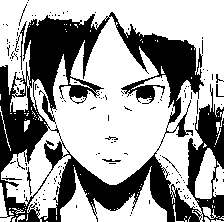

In [303]:
img = Image.fromarray(img * 255)
display(img)

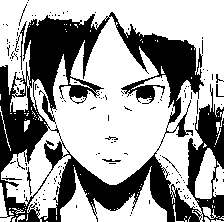

In [304]:
im = Image.fromarray(im*255)
display(im)